In [2]:
# %load ../../preconfig.py
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
plt.rcParams['axes.grid'] = False

#import numpy as np
#import pandas as pd

#import sklearn

#import itertools

import logging
logger = logging.getLogger()

25 All-Pairs Shortest Paths
===========================

### 25.1 Shortest paths and matrix multiplication
This section presents a dynamic-programming algorithm: 

1. Characterize the structure of an optimal solution.
   all subpaths of a shortest path are shortest paths.

2. Recursively define the value of an optimal solution.
   let $l_{i, j}^{(m)}$ be the minimum weight of any path from vertex $i$ to vertex $j$ that contains at most $m$ edges. Thus,
   \begin{equation}
       l_{i, j}^{(0)} = \begin{cases}
           0 & \quad \text{if } i = j \\
           \infty & \quad \text{otherwise}
       \end{cases}
   \end{equation}
   
   we recursively define:
   \begin{equation}
       l_{i, j}^{(m)} = \displaystyle \min_{1 \leq k \leq n} \{ l_{i, k}^{(m-1)} + w_{k, j} \}
   \end{equation}

3. Compute the value of an optimal solution in a bottom-up fashion.
   We now compupte a series of matrices $L^{(1)}, L^{(2)}, \dotsc, L^{(n-1)}$, where $L^{(1)} = W$.

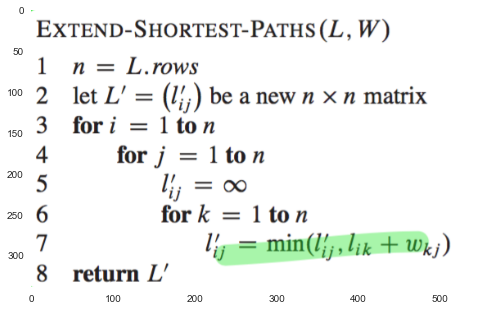

In [3]:
plt.imshow(plt.imread('./res/ext_short_path.png'))

If we replace $\infty$ by 0 in `EXTEND-SHORTEST-PATHS`, it can be converted to matrix muplication: $L^{(n-1)} = W^{n-1}$.

##### Improving the running time
We can compute $L^{(n-1)}$ by divide-and-conquer methods: $O(n) \to $O(\lg n)$.

Total running time: $O(n^3 n) \to O(n^3 \lg n)$

In [4]:
# Exercises

### 25.2 The Floyd-Warshall algorithm